***
# Exploratory Data Analysis
MSDS 7331-403, Lab 1  
*Jenna Ford, Edward Fry, Christian Nava, and Jonathan Tan* 
***

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Preprocessing for dealing with categorical variables
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# File system management
import os.path

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Constants
DATA_SOURCE = 'https://data.lacity.org/api/views/yru6-6re4/rows.csv?accessType=DOWNLOAD'

# Options
pd.set_option('float_format', '{:.2f}'.format)  # Reign in the scientific notation for reasonable values

# Load data for analysis; only read if needed because the import can take a long time
try:
    if len(df.index) < 1:
        df_raw = pd.read_csv(DATA_SOURCE) # If we get here, the dataframe was empty
except:   
    df_raw = pd.read_csv(DATA_SOURCE) # If we get here, the dataframe did not exist

In [3]:
# make copy of dataset
df = df_raw
print("The data set has {:,} rows and {:,} columns".format(*df.shape))

The data set has 1,326,626 rows and 17 columns


## Business Understanding
*(10 points)*

*Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.*

"This dataset reflects arrest incidents in the City of Los Angeles dating back to 2010. This data is transcribed from original arrest reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0.0000°, 0.0000°). Address fields are only provided to the nearest hundred block in order to maintain privacy."

## Data Understanding

*(10 points)*  
*Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.*


The data consists of 17 attributes and their descriptions are provided by the [City of Los Angeles open data](https://data.lacity.org/A-Safe-City/Arrest-Data-from-2010-to-Present/yru6-6re4) and [Kaggle](https://www.kaggle.com/cityofLA/los-angeles-crime-arrest-data). Descriptions from these locations are displayed in Table 1 below:

**Table 1: Attribute Descriptions**

| Attribute | Description |
| :--- | :--- |
| **Report ID** | ID for the arrest |
| **Arrest Date** | Date in MM/DD/YYYY format |
| **Time** | In 24-hour military time |
| **Area ID** | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. |
| **Area Name** | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| **Reporting District** | A four-digit code that represents a sub-area within a Geographic Area. All arrest records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4 |
| **Age** | Two character numeric.|
| **Sex Code** | F - Female; M - Male|
| **Descent Code** | Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian |
| **Charge Group Code** | Category of arrest charge. |
| **Charge Group Description** | Defines the Charge Group Code provided. |
| **Arrest Type Code** | A code to indicate the type of charge the individual was arrested for. D - Dependent F - Felony I - Infraction M - Misdemeanor O - Other |
| **Charge** | The charge the individual was arrested for. |
| **Charge Description** | Defines the Charge provided. |
| **Address** | Street address of crime incident rounded to the nearest hundred block to maintain anonymity. |
| **Cross Street** | Cross Street of rounded Address. |
| **Location** | The location where the crime incident occurred. Actual address is omitted for confidentiality. XY coordinates reflect the nearest 100 block. |



*(15 points)*  
*Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific.*

In [4]:
df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,191811472,05/03/2019,1700.00,18,Southeast,1802,23,F,B,nan,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,5614161,04/29/2019,1040.00,8,West LA,842,41,M,H,3.00,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,5806609,11/23/2019,1830.00,4,Hollenbeck,457,23,F,H,3.00,Robbery,F,211PC,ROBBERY,FICKETT,CINCINNATI,"(34.0477, -118.2047)"
3,5615197,04/30/2019,615.00,6,Hollywood,663,27,M,O,5.00,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
4,5615701,04/30/2019,1100.00,9,Van Nuys,901,2,F,H,nan,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326626 entries, 0 to 1326625
Data columns (total 17 columns):
Report ID                   1326626 non-null int64
Arrest Date                 1326626 non-null object
Time                        1326430 non-null float64
Area ID                     1326626 non-null int64
Area Name                   1326626 non-null object
Reporting District          1326626 non-null int64
Age                         1326626 non-null int64
Sex Code                    1326626 non-null object
Descent Code                1326626 non-null object
Charge Group Code           1236932 non-null float64
Charge Group Description    1236403 non-null object
Arrest Type Code            1326626 non-null object
Charge                      1326626 non-null object
Charge Description          1237058 non-null object
Address                     1326626 non-null object
Cross Street                755607 non-null object
Location                    1326626 non-null object
dtypes

#### Duplicate Data

We want to make sure we have unique observations, i.e., no two records have the same values for all attributes. This will reduce the risk of biased estimates. In this dataset a duplicate record would lead to further inspection as it is unlikely two arrests were made in the exact same location, on the same date and time, for the same charge, for two individuals of the same age, gender, and ethnic descent. A check for duplicate records verifies our dataset contains unique obervations.  

In [6]:
# check for duplicate records
df.duplicated().sum()

0

#### Missing Values

A check for missing values reveals that 43% of observations have missing data for the `Cross Street` attribute. This is a significant amount that will require closer inspection.

In [7]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

In [8]:
missing_data(df)

,Total,Percent
Cross Street,571019,43.04
Charge Group Description,90223,6.80
Charge Group Code,89694,6.76
Charge Description,89568,6.75
Time,196,0.01
Location,0,0.00
Reporting District,0,0.00
Arrest Date,0,0.00
Area ID,0,0.00
Area Name,0,0.00


##### Missing Values: Time

Taking a closer look at the `Time` column we saw there was at least one observation with a zero value for time, which is unusual.

In [9]:
df.Time.describe().apply(lambda x: '%.1f' % x) # suppresses scientific notation and formats to 1 decimal place

count    1326430.0
mean        1386.8
std          662.9
min            0.0
25%          945.0
50%         1510.0
75%         1930.0
max         2400.0
Name: Time, dtype: object

Upon further inspection, we found there were three observations where the time is 0.0.

In [10]:
# select rows where Time = 0
df.loc[df['Time']== 0].shape

(3, 17)

We will treat zero values as missing. These three values along with the 196 missing time values will be imputed with values of 0000. Using datetime requires a 23:00 hour format where midnight is 00:00. We will treat 0 and 24:00 as invalid entries and convert them to 0000.

In [11]:
# Convert float to string. Get rid of decimals. Replace missing or invalid values with '0000'.
df['Time'] = df['Time'].astype(str).str.split(".", expand = True)[0].replace(to_replace = ['0', '2400', 'nan'], value = '0000') 

# Fill time column with leading zeros to have 4 characters total
df['Time'] = df['Time'].apply(lambda x: '{0:0>4}'.format(x))

# Add colon to Time values by converting attribute to a datetime variable 
df['Time'] = pd.to_datetime(df['Time'], format = '%H%M').dt.time

The` Arrest Date` is already in the proper format. Once in the correct format we converted the column type to datetime and then extracted the arrest year, month, and day of week as new attributes in the dataframe.

We will use the datetime package to extract the arrest day of the week. To acheive this we will need to convert the `Arrest Date` and `Time` attributes to datetime variable types. We converted these columns to string datatypes in order to manipulate and transform them to the correct format:  MM/DD/YYYY for the date and HH:MM for the time. 

In [12]:
# Convert Arrest Date to datetime
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'])

# Extract year, month, and day of week and add to dataframe as new attributes
df['arrest_year']= df['Arrest Date'].dt.year
df['arrest_month']= df['Arrest Date'].dt.month
df['arrest_day_of_week'] = df['Arrest Date'].dt.weekday_name

##### Missing Values:  Cross Street

In [13]:
#remove duplicate whitespaces
df['Cross Street'] = df['Cross Street'].replace('\s+',' ',regex=True)
df['Address'] = df['Address'].replace('\s+',' ',regex=True)

#if all digits are numeric, nullify
df['Address New'] = np.where(df["Address"].str.isdigit() == True,np.nan, df["Address"])
df['Cross Street New'] = np.where(df["Cross Street"].str.isdigit() == True,np.nan, df["Cross Street"])

df['Address_first_word'] = df['Address'].str.split(n=1).str[0]
df['Street'] = np.where(df['Address_first_word'].str.isdigit() == True,df['Address'].str.split(n=1).str[1],df['Address'])

df['Cross_street_first_word'] = df['Cross Street'].str.split(n=1).str[0]
df['CrossStreet'] = np.where(df['Cross_street_first_word'].str.isdigit() == True,df['Cross Street'].str.split(n=1).str[1],df['Cross Street'])


In [14]:
df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Location,arrest_year,arrest_month,arrest_day_of_week,Address New,Cross Street New,Address_first_word,Street,Cross_street_first_word,CrossStreet
0,191811472,2019-05-03,17:00:00,18,Southeast,1802,23,F,B,nan,...,"(33.9543, -118.2827)",2019,5,Friday,91ST,FIGUEROA,91ST,91ST,FIGUEROA,FIGUEROA
1,5614161,2019-04-29,10:40:00,8,West LA,842,41,M,H,3.00,...,"(34.0508, -118.4592)",2019,4,Monday,11600 WILSHIRE BL,NaN,11600,WILSHIRE BL,NaN,NaN
2,5806609,2019-11-23,18:30:00,4,Hollenbeck,457,23,F,H,3.00,...,"(34.0477, -118.2047)",2019,11,Saturday,FICKETT,CINCINNATI,FICKETT,FICKETT,CINCINNATI,CINCINNATI
3,5615197,2019-04-30,06:15:00,6,Hollywood,663,27,M,O,5.00,...,"(34.0907, -118.3384)",2019,4,Tuesday,LA BREA,LEXINGTON,LA,LA BREA,LEXINGTON,LEXINGTON
4,5615701,2019-04-30,11:00:00,9,Van Nuys,901,2,F,H,nan,...,"(34.2149, -118.4674)",2019,4,Tuesday,RAYMER,SEPULVEDA BL,RAYMER,RAYMER,SEPULVEDA,SEPULVEDA BL


#### Remove Unecessary Attributes

The `Charge Group Description`, `Charge Group Code`, and `Charge Description` all provide similar information as the `Charge`. Of these four attributes, `Charge` is the only attribute that does not have missing values. We will drop `Charge Group Description`, `Charge Group Code`, and `Charge Description`.

In [15]:
# remove redundandt columns or those that do not relevant information
# EF: We don't want to be too zealous in deleting information until we finish with the analysis.
df.drop(['Report ID',
         'Area ID'], axis=1, inplace=True)

In [16]:
# Change data types
df['Age'] = df['Age'].astype(np.int8)
df['Reporting District'] = df['Reporting District'].astype(np.str)


# Assign, clean up, and split out the classes of data
ordinalFeatures = ['Arrest Date', 'Time', 'Age']
categoricalFeatures = ['Area Name', 'Reporting District', 'Sex Code', 'Descent Code',
                       'Charge Group Description', 'Arrest Type Code', 'Charge', 'Charge Description',
                       'Address', 'Cross Street', 'Location']



In [17]:
#delete columns not relevant to analysis
# EF: We may find these useful later on.  Had to comment out so indexing would work properly later on.
#df_cleansed.drop(['Time','Hour','Minute','Address','Cross Street','Address New','Cross Street New','Address_first_word','Cross_street_first_word'],axis=1,inplace=True)

##### CN: I don't this this section is necessary since the time and date fields are already in the needed format.


#create year, month, day, day of week columns

def findYear(date):
    year = datetime.datetime.strptime(date, '%m/%d/%Y').year
    return(year)

df_cleansed['Year'] = df_cleansed['Arrest Date'].apply(findYear)

def findMonth(date):
    month = datetime.datetime.strptime(date, '%m/%d/%Y').month
    return(month)

df_cleansed['Month'] = df_cleansed['Arrest Date'].apply(findMonth)

def findDay(date):
    day = datetime.datetime.strptime(date, '%m/%d/%Y').day
    return(day)

df_cleansed['Day'] = df_cleansed['Arrest Date'].apply(findDay)

def findDay(date): 
    day = datetime.datetime.strptime(date, '%m/%d/%Y').weekday() 
    return (calendar.day_name[day]) 

#df_cleansed['Day of Week'] = df_cleansed['Arrest Date'].apply(findDay)

def findNDay(date): 
    day = datetime.datetime.strptime(date, '%m/%d/%Y').weekday() 
    return (day) 

df_cleansed['N Day of Week'] = df_cleansed['Arrest Date'].apply(findNDay)

#check results
df_cleansed
if not os.path.exists(r'Cleansed.csv'):  # File takes a long time to write, so only execute when it isn't there
    df_cleansed.to_csv(r'Cleansed.csv')

*(10 points)*   
*Give simple, appropriate statistics (range, mode, mean, median, variance,
counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.*  

In [18]:
df[categoricalFeatures].describe()

,Area Name,Reporting District,Sex Code,Descent Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
count,1326626,1326626,1326626,1326626,1236403,1326626,1326626,1237058,1326626,755607,1326626
unique,21,1351,2,19,27,5,9166,2371,83241,20650,54633
top,Central,1412,M,H,Miscellaneous Other Violations,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,6TH ST,FIGUEROA,"(34.1837, -118.4465)"
freq,131318,19246,1050017,618933,245283,807017,99240,98754,13272,10965,8437


In [19]:
df['Descent Code'].describe()

count     1326626
unique         19
top             H
freq       618933
Name: Descent Code, dtype: object

*(15 points)*  
*Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.*

### Age

We notice there is at least one observation with an age of zero. 

In [20]:
df['Age'].describe()

count   1326626.00
mean         34.23
std          13.61
min           0.00
25%          23.00
50%          32.00
75%          45.00
max          97.00
Name: Age, dtype: float64

In [21]:
# select rows where Time = 0
df.loc[df['Age']== 0].shape

(971, 24)

We will treat the observations where age is zero as data entry errors, and we will...

In [22]:
#I guess we can disscuss how we want to approach this

# Drop the observations where Age is zero
#df.drop(df[df['Age'] == 0].index, inplace = True) 

# Or impute the zero values with the median value of Age

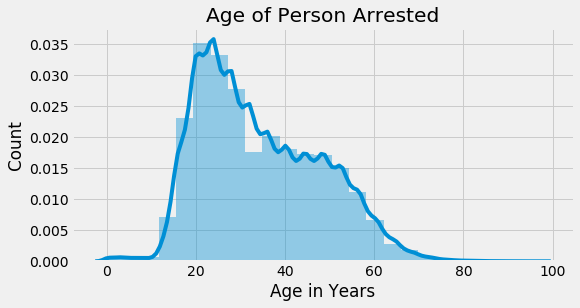

In [23]:
# set plot style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 4))

# distribution of age in years
sns.distplot(df['Age'], bins = 25);
plt.title('Age of Person Arrested'); plt.xlabel('Age in Years'); plt.ylabel('Count');

##### Age by Sex Code

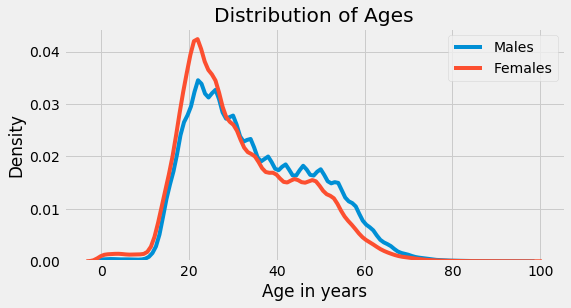

In [24]:
plt.figure(figsize = (8, 4))

# KDE Plot of males
sns.kdeplot(df.loc[df['Sex Code'] == 'M', 'Age'], label = 'Males')

# KDE plot of females                   
sns.kdeplot(df.loc[df['Sex Code'] == 'F', 'Age'], label = 'Females')

# Labels
plt.xlabel('Age in years'); plt.ylabel('Density'); plt.title('Distribution of Ages');

##### Age by Arrest Type Code

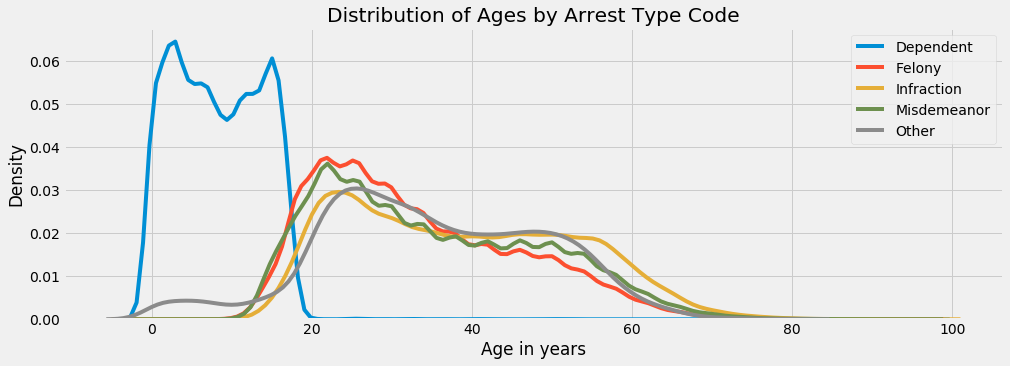

In [25]:
plt.figure(figsize = (15, 5))

# KDE Plot of Dependent Arrest Code
sns.kdeplot(df.loc[df['Arrest Type Code'] == 'D', 'Age'], label = 'Dependent')

# KDE plot of Felony Arrest Code                   
sns.kdeplot(df.loc[df['Arrest Type Code'] == 'F', 'Age'], label = 'Felony')

# KDE plot of Infraction Arrest Code                   
sns.kdeplot(df.loc[df['Arrest Type Code'] == 'I', 'Age'], label = 'Infraction')

# KDE plot of Misdemeanor Arrest Code                   
sns.kdeplot(df.loc[df['Arrest Type Code'] == 'M', 'Age'], label = 'Misdemeanor')

# KDE plot of Other Arrest Code                   
sns.kdeplot(df.loc[df['Arrest Type Code'] == 'O', 'Age'], label = 'Other')

# Labels
plt.xlabel('Age in years'); plt.ylabel('Density'); plt.title('Distribution of Ages by Arrest Type Code');

### Descent Code
##### Kernel Density Estimate Plot of Age by Descent Code

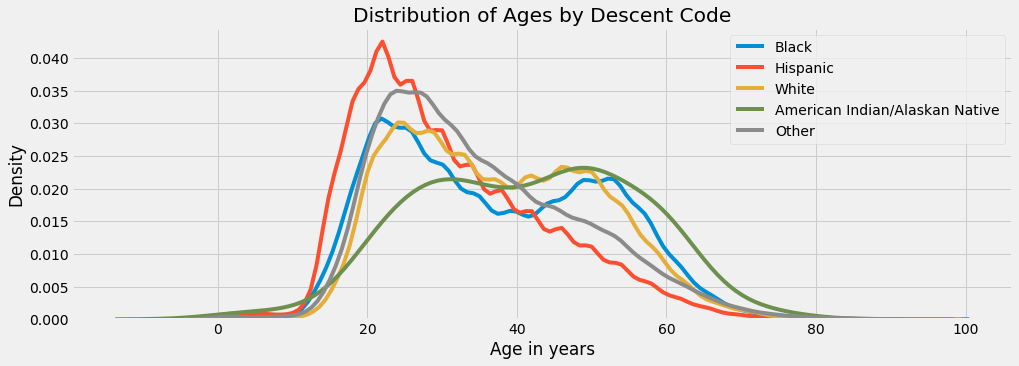

In [26]:
plt.figure(figsize = (15, 5))

# KDE Plots Age by Descent Code
sns.kdeplot(df.loc[df['Descent Code'] == 'B', 'Age'], label = 'Black')
sns.kdeplot(df.loc[df['Descent Code'] == 'H', 'Age'], label = 'Hispanic')
sns.kdeplot(df.loc[df['Descent Code'] == 'W', 'Age'], label = 'White')
sns.kdeplot(df.loc[df['Descent Code'] == 'I', 'Age'], label = 'American Indian/Alaskan Native')
sns.kdeplot(df.loc[df['Descent Code'] == 'O', 'Age'], label = 'Other')

# CN: Still working on these:
#Asian = ['A', 'C', 'D', 'G', 'F', 'J', 'K', 'L', 'V', 'Z']
#PacificIslander = ['G', 'S', 'P', 'U']

#sns.kdeplot(df[df['Descent Code'].isin(Asian), 'Age'], label = 'Asian')
#sns.kdeplot(df[df['Descent Code'].isin(PacificIslander), 'Age'], label = 'Pacific Islander')


# Labels
plt.xlabel('Age in years'); plt.ylabel('Density'); plt.title('Distribution of Ages by Descent Code');

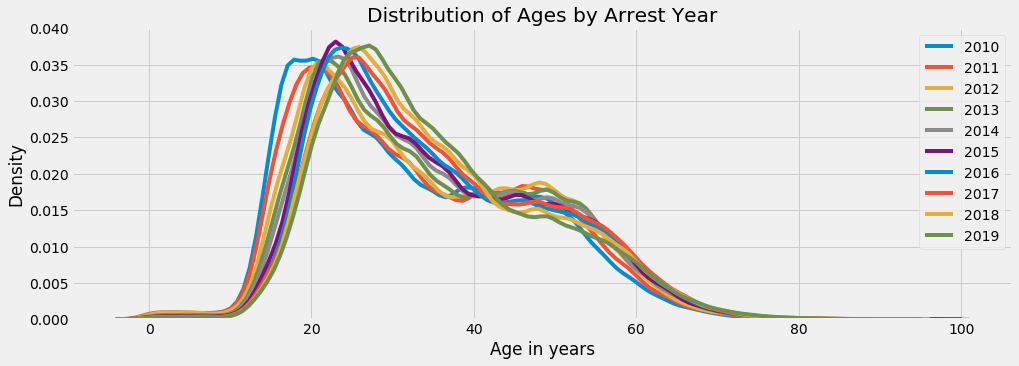

In [27]:
plt.figure(figsize = (15, 5))

# KDE Plots Age by Arrest Year
sns.kdeplot(df.loc[df['arrest_year'] == 2010, 'Age'], label = '2010')
sns.kdeplot(df.loc[df['arrest_year'] == 2011, 'Age'], label = '2011')
sns.kdeplot(df.loc[df['arrest_year'] == 2012, 'Age'], label = '2012')
sns.kdeplot(df.loc[df['arrest_year'] == 2013, 'Age'], label = '2013')
sns.kdeplot(df.loc[df['arrest_year'] == 2014, 'Age'], label = '2014')
sns.kdeplot(df.loc[df['arrest_year'] == 2015, 'Age'], label = '2015')
sns.kdeplot(df.loc[df['arrest_year'] == 2016, 'Age'], label = '2016')
sns.kdeplot(df.loc[df['arrest_year'] == 2017, 'Age'], label = '2017')
sns.kdeplot(df.loc[df['arrest_year'] == 2018, 'Age'], label = '2018')
sns.kdeplot(df.loc[df['arrest_year'] == 2019, 'Age'], label = '2019')

# Labels
plt.xlabel('Age in years'); plt.ylabel('Density'); plt.title('Distribution of Ages by Arrest Year');

(array([9.7100e+02, 7.8400e+02, 8.3400e+02, 8.4000e+02, 7.6200e+02,
        8.0700e+02, 7.4200e+02, 6.7500e+02, 7.0500e+02, 6.9000e+02,
        7.0100e+02, 1.0910e+03, 2.6530e+03, 5.7300e+03, 1.0866e+04,
        1.7598e+04, 2.3013e+04, 2.6296e+04, 3.1397e+04, 3.8437e+04,
        4.2013e+04, 4.6478e+04, 4.6539e+04, 4.6089e+04, 4.5158e+04,
        4.3900e+04, 4.2023e+04, 4.0520e+04, 3.8205e+04, 3.6479e+04,
        3.4935e+04, 3.3482e+04, 3.1435e+04, 0.0000e+00, 3.0583e+04,
        2.8975e+04, 2.7538e+04, 2.6134e+04, 2.5264e+04, 2.4745e+04,
        2.3930e+04, 2.3518e+04, 2.3306e+04, 2.2647e+04, 2.2084e+04,
        2.1827e+04, 2.2342e+04, 2.2426e+04, 2.2576e+04, 2.2016e+04,
        2.2046e+04, 2.1639e+04, 2.0595e+04, 2.0020e+04, 1.9114e+04,
        1.7966e+04, 1.6454e+04, 1.5211e+04, 1.3545e+04, 1.2082e+04,
        1.0430e+04, 9.3590e+03, 7.6740e+03, 6.7700e+03, 5.5460e+03,
        4.8170e+03, 0.0000e+00, 3.8970e+03, 3.2490e+03, 2.6250e+03,
        2.0390e+03, 1.7050e+03, 1.4580e+03, 1.09

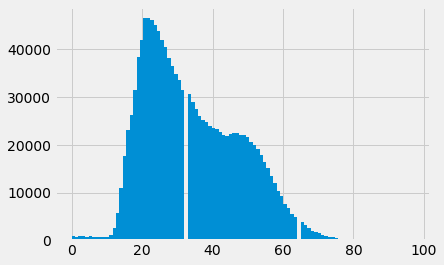

In [28]:
# Take a look at age, sex, and descent in more detail
plt.hist(df['Age'], bins = 100)

Text(0.5, 0, 'Arrests')

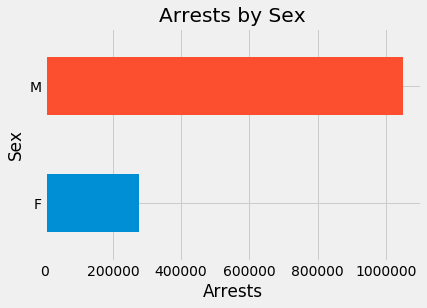

In [29]:
# Sex plot
arrests_by_code = df["Sex Code"].value_counts()
arrests_by_code.sort_values().plot(kind='barh')
plt.title('Arrests by Sex')
plt.ylabel('Sex')
plt.xlabel('Arrests')

Text(0.5, 0, 'Arrests')

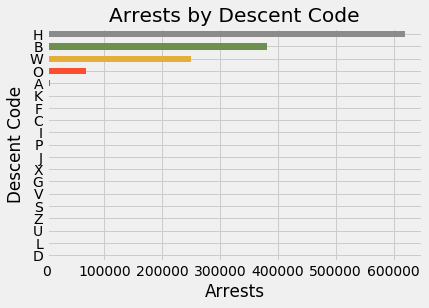

In [30]:
# Descent code plot
arrests_by_code = df["Descent Code"].value_counts()
arrests_by_code.sort_values().plot(kind='barh')
plt.title('Arrests by Descent Code')
plt.ylabel('Descent Code')
plt.xlabel('Arrests')

*(15 points)*  
*Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.*  

##### Arrests by Gender and Day of Week

In [31]:
# define colors
coral = '#f88c8c'
lightgreen = '#99ee98'

In [32]:
pd.crosstab(index=df['arrest_day_of_week'], columns=df['Sex Code']).style.format("{:,.0f}").highlight_max(color=lightgreen).highlight_min(color=coral)

Sex Code,F,M
arrest_day_of_week,,
Friday,"44,995","169,808"
Monday,"30,986","119,738"
Saturday,"38,941","149,171"
Sunday,"30,533","123,388"
Thursday,"47,267","173,096"
Tuesday,"37,772","143,546"
Wednesday,"46,115","171,270"


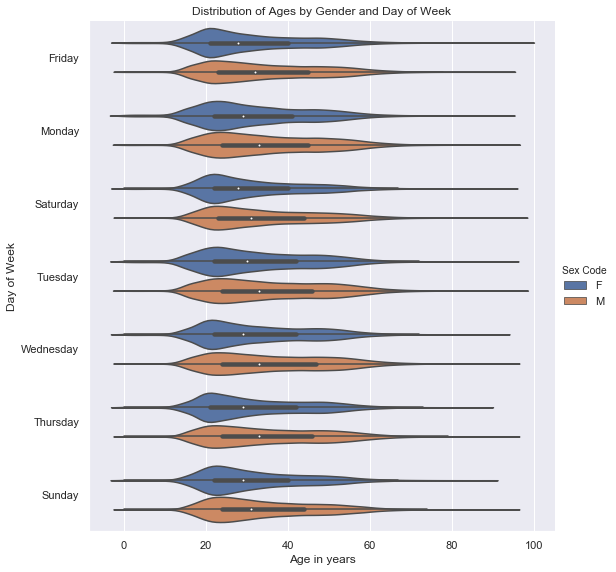

In [33]:
sns.set(rc={'figure.figsize':(20,35)})

# Violin Plot
sns.catplot(x = "Age",
           y = "arrest_day_of_week",
           hue = "Sex Code",
           kind = "violin",
           data = df,
           height = 8);

# Labels
plt.xlabel('Age in years'); plt.ylabel('Day of Week'); plt.title('Distribution of Ages by Gender and Day of Week');

In [34]:
# cross tab of arrests by Gender, Arrest Type Code, and Day of Week
pd.crosstab(index=df['arrest_day_of_week'], 
            columns=[df['Sex Code'], 
                     df['Arrest Type Code']], 
            colnames=['Sex Code','Arrest Type Code']).style.format("{:,.0f}").highlight_max(color = lightgreen).highlight_min(color = coral)

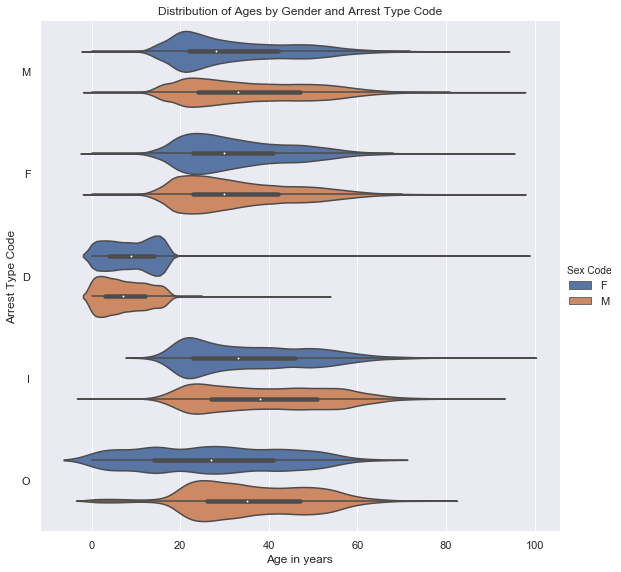

In [35]:
# Violin plot
sns.catplot(x = "Age",
           y = "Arrest Type Code",
           hue = "Sex Code",
           kind = "violin",
           data = df,
           height = 8);

# Labels
plt.xlabel('Age in years'); plt.ylabel('Arrest Type Code'); plt.title('Distribution of Ages by Gender and Arrest Type Code');

In [36]:
#CN: Something is broken with this one. Need to keep working on it.
#Violin Plot
#sns.catplot(x = "Age",
#           y = df["Descent Code"],
#           hue = "Sex Code",
#           kind = "violin",
#           data = df,
#           height = 8);

# Labels
#plt.xlabel('Age in years'); plt.ylabel('Descent Code'); plt.title('Distribution of Ages by Gender and Descent Code');

*(10 points)*  
*Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).*

*(5 points)*  
*Are there other features that could be added to the data or created from
existing features? Which ones?*

## Exceptional Work
*(10 points)*  
• *You have free reign to provide additional analyses.  
• One idea: implement dimensionality reduction, then visualize and interpret the results.*